In [58]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import FunctionTransformer

**chargement de données**

In [4]:
housing=fetch_california_housing(as_frame=True)
df=housing.frame
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [5]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


# partie 1 : Exploration des données

In [7]:
df.isna().sum() #cheking missing values

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [8]:
mean_df=np.mean(df)
print(f"la moyenneest: {mean_df}")

la moyenneest: 153.9682163133476


In [9]:
std_df=np.std(df)
print(f"l'écart type est: {std_df}")

l'écart type est: 588.5734743237019


In [10]:
max_df=np.max(df)
max_df

np.float64(35682.0)

In [11]:
min_df=np.min(df)
min_df

np.float64(-124.35)

In [ ]:
df.isnull().value_counts()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  Longitude  MedHouseVal
False   False     False     False      False       False     False     False      False          20640
Name: count, dtype: int64

In [40]:

df["MedInc"].quantile(0.5)

np.float64(3.5347999999999997)

In [41]:
df.MedInc.quantile(0.25)

np.float64(2.5633999999999997)

In [38]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


# analyse de distributions

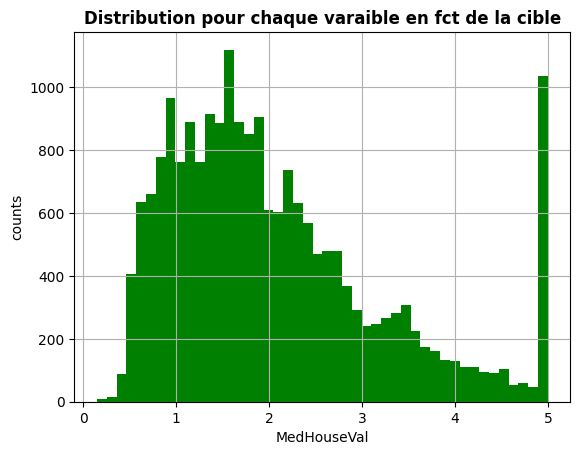

In [ ]:
plt.figure()
df["MedHouseVal"].hist(bins="auto", color='green' )
plt.title("Distribution pour chaque varaible en fct de la cible", fontweight='bold')
plt.xlabel("MedHouseVal")
plt.ylabel("counts")
plt.show()


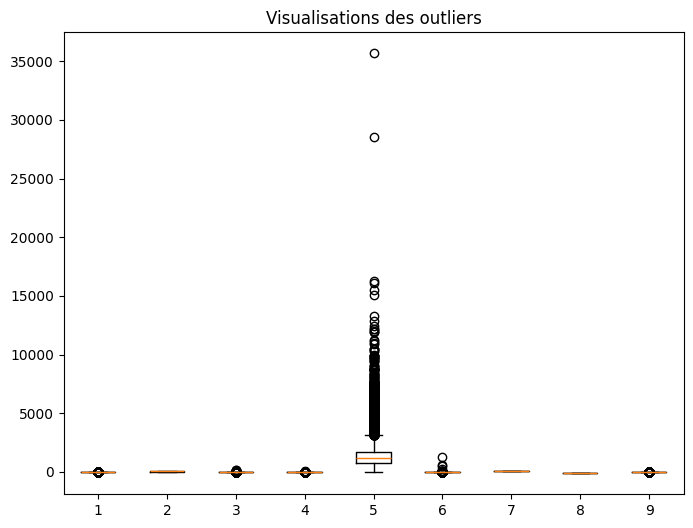

In [ ]:
fig=plt.figure(figsize=(8,6))
plt.title("Visualisations des outliers")
plt.boxplot(df)
plt.show()

# Etudes de correlation

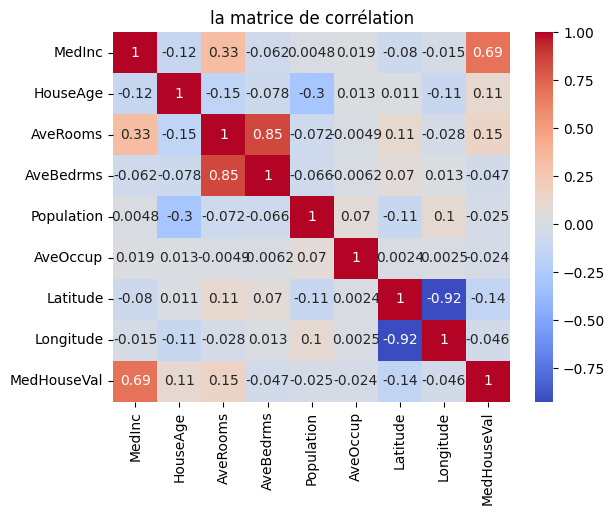

In [14]:
matrice_correlation=df.corr()
sns.heatmap(matrice_correlation, annot=True , cmap='coolwarm')
plt.title("la matrice de corrélation")
plt.show()


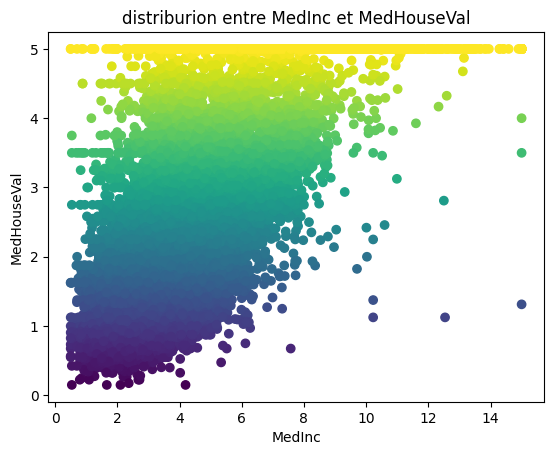

In [27]:
plt.figure()
plt.scatter(df["MedInc"] ,df["MedHouseVal"], c=df["MedHouseVal"], cmap='viridis')
plt.title("distriburion entre MedInc et MedHouseVal")
plt.xlabel("MedInc")
plt.ylabel("MedHouseVal")
plt.show()

# Analyse géographique

C:\Users\samya.taqi\AppData\Local\Temp\ipykernel_16608\814069275.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


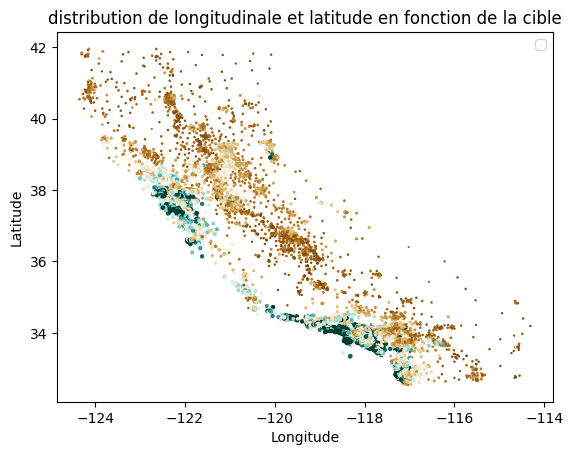

In [36]:
plt.figure()
plt.scatter(df["Longitude"], df["Latitude"] ,df["MedHouseVal"],c=df["MedHouseVal"] , cmap="BrBG")
plt.title("distribution de longitudinale et latitude en fonction de la cible")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend()
plt.show()

# Nettoyage des données

# gestion des outliers

**la méthode de IQR : interquartile range  : detection rules**

In [ ]:
#pour la variable AveRooms

Q1= df["AveRooms"].quantile(0.25)
Q3=df["AveRooms"].quantile(0.75)
IQR=Q3-Q1


#  Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Lower bound = {lower_bound}, Upper bound = {upper_bound}")

#  Detect outliers
outliers = df[(df["AveRooms"] < lower_bound) | (df["AveRooms"] > upper_bound)]
print("\nOutliers detected:\n", outliers)

Q1 = 4.440716235896959, Q3 = 6.052380952380952, IQR = 1.6116647164839932
Lower bound = 2.023219161170969, Upper bound = 8.469878027106942

Outliers detected:
         MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
73      0.4999      46.0  1.714286   0.571429        18.0  2.571429     37.81   
155     8.8793      52.0  8.972868   1.131783       861.0  3.337209     37.81   
511    13.4990      42.0  8.928358   1.000000      1018.0  3.038806     37.82   
512    12.2138      52.0  9.210227   1.039773      1001.0  2.843750     37.82   
514    12.3804      52.0  9.122715   1.033943      1192.0  3.112272     37.82   
...        ...       ...       ...        ...         ...       ...       ...   
20408   7.7889      26.0  8.730038   1.045627       842.0  3.201521     34.19   
20426  10.0472      11.0  9.890756   1.159664       415.0  3.487395     34.18   
20428   8.7288       6.0  8.715842   1.102970      3385.0  3.351485     34.23   
20436  12.5420      10.0  9.873

In [ ]:
#pour la variable AveOccup

Q1= df["AveOccup"].quantile(0.25)
Q3=df["AveOccup"].quantile(0.75)
IQR=Q3-Q1


#  Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 = {Q1}, Q3 = {Q3}, IQR = {IQR}")
print(f"Lower bound = {lower_bound}, Upper bound = {upper_bound}")

#  Detect outliers
outliers = df[(df["AveOccup"] < lower_bound) | (df["AveOccup"] > upper_bound)]
print("\nOutliers detected:\n", outliers)

Q1 = 2.4297411475535755, Q3 = 3.2822609242736216, IQR = 0.8525197767200461
Lower bound = 1.1509614824735064, Upper bound = 4.5610405893536905

Outliers detected:
        MedInc  HouseAge  AveRooms  AveBedrms  Population   AveOccup  Latitude  \
89     1.2434      52.0  2.929412   0.917647       396.0   4.658824     37.80   
91     0.8668      52.0  2.443182   0.988636       904.0  10.272727     37.80   
92     0.7500      52.0  2.823529   0.911765       191.0   5.617647     37.80   
200    3.0257      52.0  4.046948   1.009390       994.0   4.666667     37.78   
270    3.8750      33.0  3.021277   0.659574       575.0  12.234043     37.78   
...       ...       ...       ...        ...         ...        ...       ...   
20353  5.0066      12.0  3.800000   1.466667        69.0   4.600000     34.13   
20393  5.7560      16.0  6.117493   1.026110      2007.0   5.240209     34.22   
20513  2.6250      34.0  5.597403   1.103896       391.0   5.077922     38.67   
20527  1.4653       7.0  3.

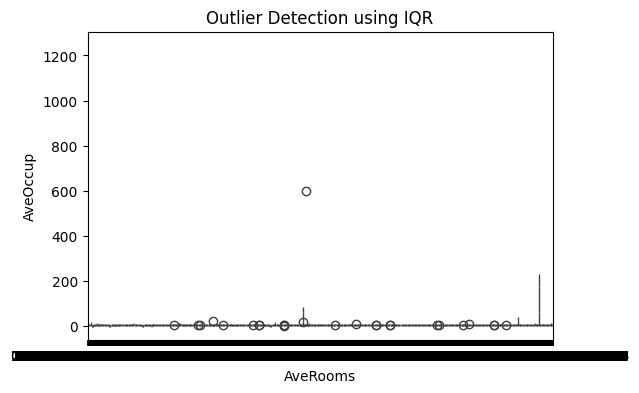

In [54]:
#  Visualization (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x=df["AveRooms"],y=df["AveOccup"],)
plt.title("Outlier Detection using IQR")
plt.show()

In [60]:
data_log=np.log(df)
df

c:\Users\samya.taqi\Desktop\SAMYA TAQI\samya.taqi\classification\regressionenv\Lib\site-packages\pandas\core\internals\blocks.py:347: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
data_log=FunctionTransformer(np.log)
data_log.transform(df)


c:\Users\samya.taqi\Desktop\SAMYA TAQI\samya.taqi\classification\regressionenv\Lib\site-packages\pandas\core\internals\blocks.py:347: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


,"func func: callable, default=NoneThe callable to use for the transformation. This will be passedthe same arguments as transform, with args and kwargs forwarded.If func is None, then func will be the identity function.",<ufunc 'log'>
,"inverse_func inverse_func: callable, default=NoneThe callable to use for the inverse transformation. This will bepassed the same arguments as inverse transform, with args andkwargs forwarded. If inverse_func is None, then inverse_funcwill be the identity function.",None
,"validate validate: bool, default=FalseIndicate that the input X array should be checked before calling``func``. The possibilities are:- If False, there is no input validation.- If True, then X will be converted to a 2-dimensional NumPy array or sparse matrix. If the conversion is not possible an exception is raised... versionchanged:: 0.22 The default of ``validate`` changed from True to False.",False
,"accept_sparse accept_sparse: bool, default=FalseIndicate that func accepts a sparse matrix as input. If validate isFalse, this has no effect. Otherwise, if accept_sparse is false,sparse matrix inputs will cause an exception to be raised.",False
,"check_inverse check_inverse: bool, default=TrueWhether to check that or ``func`` followed by ``inverse_func`` leads tothe original inputs. It can be used for a sanity check, raising awarning when the condition is not fulfilled... versionadded:: 0.20",True
,"feature_names_out feature_names_out: callable, 'one-to-one' or None, default=NoneDetermines the list of feature names that will be returned by the`get_feature_names_out` method. If it is 'one-to-one', then the outputfeature names will be equal to the input feature names. If it is acallable, then it must take two positional arguments: this`FunctionTransformer` (`self`) and an array-like of input feature names(`input_features`). It must return an array-like of output featurenames. The `get_feature_names_out` method is only defined if`feature_names_out` is not None.See ``get_feature_names_out`` for more details... versionadded:: 1.1",None
,"kw_args kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to func... versionadded:: 0.18",None
,"inv_kw_args inv_kw_args: dict, default=NoneDictionary of additional keyword arguments to pass to inverse_func... versionadded:: 0.18",None


In [ ]:
upper = df["AveOccup"].quantile(0.99)
df["AveOccup"] = np.log1p(df["AveOccup"].clip(upper=upper))


In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10,4))
df["AveOccup"].hist(ax=ax[0], bins=40)
ax[0].set_title("Avant log")

np.log1p(df["AveOccup"]).hist(ax=ax[1], bins=40)
ax[1].set_title("Après log")
plt.show()
